In [1]:
from diffusers import BitsAndBytesConfig, FluxTransformer2DModel
import torch

ckpt_id = "black-forest-labs/FLUX.1-schnell"
nf4_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
model_nf4 = FluxTransformer2DModel.from_pretrained(
    ckpt_id,
    subfolder="transformer",
    quantization_config=nf4_config,
    torch_dtype=torch.bfloat16
)


/environment/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-26 03:13:10.694561: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 03:13:11.597703: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Fetching 3 files: 100%|██████████| 3/3 [00:00<00:00, 30102.66it/s]


In [2]:
from diffusers import FluxPipeline, StableDiffusion3Pipeline

pipeline = FluxPipeline.from_pretrained(
    ckpt_id, 
    transformer=model_nf4,
    torch_dtype=torch.bfloat16
)
pipeline.enable_model_cpu_offload()


Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]


In [4]:
##??pipeline.__call__

In [5]:
prompt = "A whimsical and creative image depicting a hybrid creature that is a mix of a waffle and a hippopotamus, basking in a river of melted butter amidst a breakfast-themed landscape. It features the distinctive, bulky body shape of a hippo. However, instead of the usual grey skin, the creature's body resembles a golden-brown, crispy waffle fresh off the griddle. The skin is textured with the familiar grid pattern of a waffle, each square filled with a glistening sheen of syrup. The environment combines the natural habitat of a hippo with elements of a breakfast table setting, a river of warm, melted butter, with oversized utensils or plates peeking out from the lush, pancake-like foliage in the background, a towering pepper mill standing in for a tree.  As the sun rises in this fantastical world, it casts a warm, buttery glow over the scene. The creature, content in its butter river, lets out a yawn. Nearby, a flock of birds take flight"

image = pipeline(
    prompt=prompt,
    #negative_prompt="",
    num_inference_steps=50,
    guidance_scale=4.5,
    max_sequence_length=512,
).images[0]
image.save("whimsical_nf4.png")


Token indices sequence length is longer than the specified maximum sequence length for this model (200 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. the skin is textured with the familiar grid pattern of a waffle, each square filled with a glistening sheen of syrup. the environment combines the natural habitat of a hippo with elements of a breakfast table setting, a river of warm, melted butter, with oversized utensils or plates peeking out from the lush, pancake - like foliage in the background, a towering pepper mill standing in for a tree. as the sun rises in this fantastical world, it casts a warm, buttery glow over the scene. the creature, content in its butter river, lets out a yawn. nearby, a flock of birds take flight']
100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


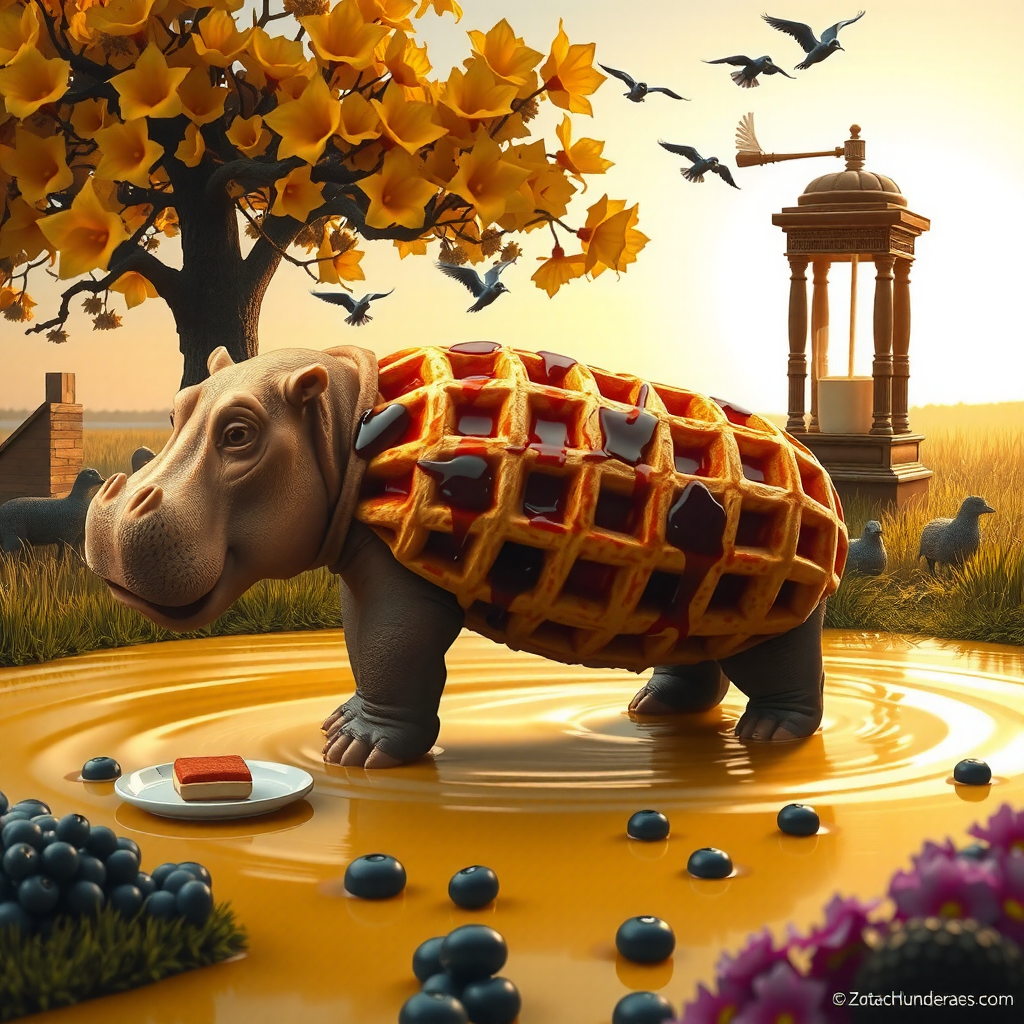

In [6]:
from IPython import display 
display.Image("whimsical_nf4.png")
